In [16]:
using CSV, Plots, DataFrames, Measurements, LsqFit, Roots, LinearRegression

# Winkelabhängigkeit 511/511keV

## Einlesen der Daten

In [17]:
data_1 = CSV.read("data/winkelabhängigkeit_511keV.csv", DataFrame)
angles_1 = measurement.(data_1[:,1], 0.5)
c_per_min_1 = measurement.(data_1[:,2], data_1[:,3])

21-element Vector{Measurement{Float64}}:
  292.0 ± 17.0
  270.0 ± 16.0
  264.0 ± 16.0
  290.0 ± 17.0
  311.0 ± 17.0
  452.0 ± 21.0
  611.0 ± 24.0
  932.0 ± 30.0
 1085.0 ± 32.0
 1415.0 ± 37.0
        ⋮
 1392.0 ± 37.0
 1215.0 ± 34.0
  883.0 ± 29.0
  595.0 ± 24.0
  414.0 ± 20.0
  373.0 ± 19.0
  317.0 ± 17.0
  286.0 ± 16.0
  244.0 ± 15.0

## Plotten der Daten

Fit-Parameter: [1317.1118578100727, 0.26812732707433, 1.4090213441689625, 258.2548705550596]
A = measurement(fit.param[1], param_errors[1]) = 1317.0 ± 22.0
mu = measurement(fit.param[2], param_errors[2]) = 0.268 ± 0.024
sigma = measurement(fit.param[3], param_errors[3]) = 1.409 ± 0.032
FWHM = measurement(2 * sqrt(2 * log(2)) * fit.param[3], 2 * sqrt(2 * log(2)) * param_errors[3]) = 3.318 ± 0.076


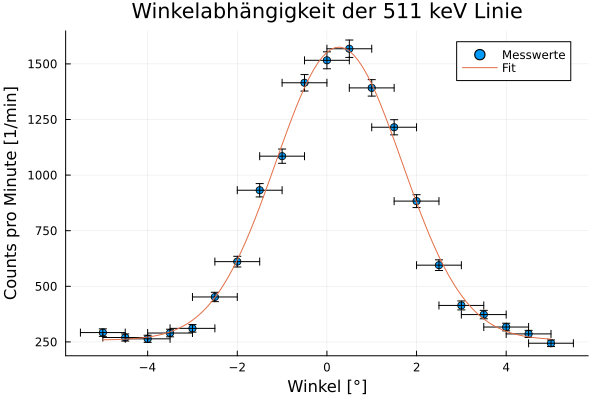

In [23]:
# Definiere die Fit-Funktion
fit_model(x, p) = @. p[1] * exp(-1/2 * ((x - p[2]) / p[3])^2) + p[4]

# Extrahiere die Werte aus den Messungen
x_data = [angles_1[i].val for i in 1:length(angles_1)]
y_data = [c_per_min_1[i].val for i in 1:length(c_per_min_1)]

# Initiale Schätzungen für die Parameter A, mu, sigma, b
p0 = [2000.0, 0.0, 2.0, 200.0]  # Erhöhe den Wert für A

# Führe den Fit durch
fit = curve_fit(fit_model, x_data, y_data, p0)

# Berechne die Unsicherheiten der Fit-Parameter
param_errors = standard_errors(fit)

# Zeige die Fit-Parameter an 
println("Fit-Parameter: ", fit.param)

# Plotte die Daten zusammen mit dem Fit und der Halbwertsbreite
fig_1 = plot(
    angles_1, c_per_min_1,
    seriestype="scatter",
    label="Messwerte",
    xlabel="Winkel [°]",
    ylabel="Counts pro Minute [1/min]",
    title="Winkelabhängigkeit der 511 keV Linie"
)

plot!(
    x -> fit_model(x, fit.param),
    minimum(x_data):0.1:maximum(x_data),
    label="Fit"
)

@show A = measurement(fit.param[1], param_errors[1])
@show mu = measurement(fit.param[2], param_errors[2])
@show sigma = measurement(fit.param[3], param_errors[3])
@show FWHM = measurement(2 * sqrt(2 * log(2)) * fit.param[3], 2 * sqrt(2 * log(2)) * param_errors[3])

display(fig_1)

## Speichern des Plots

In [19]:
savefig(fig_1, "plots/winkelabhängigkeit_511keV.png")

"/home/benedikt/OneDrive/Uni/Sem_5/Kern_Teilchen_Physik/Praktikum/B3.4/B3_4_Auswertung/plots/winkelabhängigkeit_511keV.png"

# Winkelabhängigkeit 511/1275keV

## Einlesen der Daten

In [20]:
data_2 = CSV.read("data/winkelabhängigkeit_511_1275keV.csv", DataFrame)
angles_2 = measurement.(data_2[:,1], 0.5)
c_per_min_2 = measurement.(data_2[:,2], data_2[:,3])

11-element Vector{Measurement{Float64}}:
 14.0 ± 3.0
 14.0 ± 3.0
 20.0 ± 4.0
 14.0 ± 3.0
 12.0 ± 3.0
 16.0 ± 4.0
 18.0 ± 4.0
 21.0 ± 4.0
 24.0 ± 4.0
 16.0 ± 4.0
 21.0 ± 4.0

## Plotten der Daten

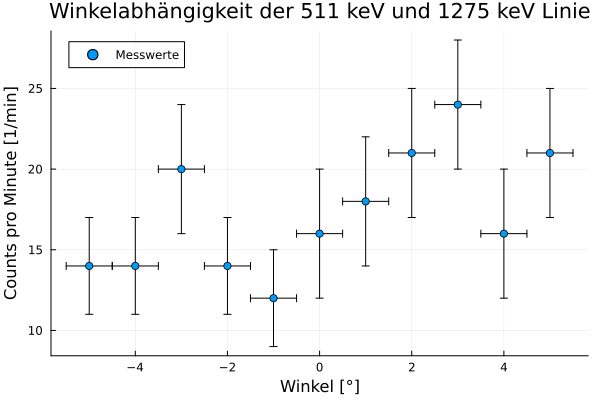

In [21]:
fig_2 = plot(
    angles_2,
    c_per_min_2,
    seriestype = :scatter,
    label = "Messwerte",
    xlabel = "Winkel [°]",
    ylabel = "Counts pro Minute [1/min]",
    title = "Winkelabhängigkeit der 511 keV und 1275 keV Linie"
)


display(fig_2)

## Speichern der Daten

In [22]:
savefig(fig_2, "plots/winkelabhängigkeit_511_1275keV.png")

"/home/benedikt/OneDrive/Uni/Sem_5/Kern_Teilchen_Physik/Praktikum/B3.4/B3_4_Auswertung/plots/winkelabhängigkeit_511_1275keV.png"